In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(rc={'figure.figsize':(14,4)})

TEST_TIMEOUT = 60

In [36]:
df = pd.read_csv("../data/control_channel.csv", header=0)
df = df.rename(columns={"drop_percent":"drop (%)"})

# take the average values for each switch x packet size 
avg_df = df.groupby(['switch', 'rate (Hz)']).mean()

# dont need trial no. anymore 
avg_df = avg_df.drop('trial', axis=1)
avg_df = avg_df.reset_index()

In [37]:
avg_df

switch  rate (Hz)  packets sent  drop (%)
0   ovs           2          20.0     0.009
1   ovs           8          80.0     0.009
2   ovs          64         640.0     0.000
3   ovs         128        1280.0     0.070
4   ovs         256        2560.0     0.247
5   ovs         512        5120.0     0.472
6   ovs        1024       10240.0     0.655

In [38]:
# set log cols: 
LOG_COLS = ['rate (Hz)',
            'packets sent']

for lc in LOG_COLS: 
    print(lc)
    avg_df[f'{lc}_log2'] = np.log2(avg_df[f'{lc}']) 

rate (Hz)
packets sent


In [39]:
avg_df.head()

switch  rate (Hz)  packets sent  drop (%)  rate (Hz)_log2  packets sent_log2
0   ovs           2          20.0     0.009             1.0           4.321928
1   ovs           8          80.0     0.009             3.0           6.321928
2   ovs          64         640.0     0.000             6.0           9.321928
3   ovs         128        1280.0     0.070             7.0          10.321928
4   ovs         256        2560.0     0.247             8.0          11.321928

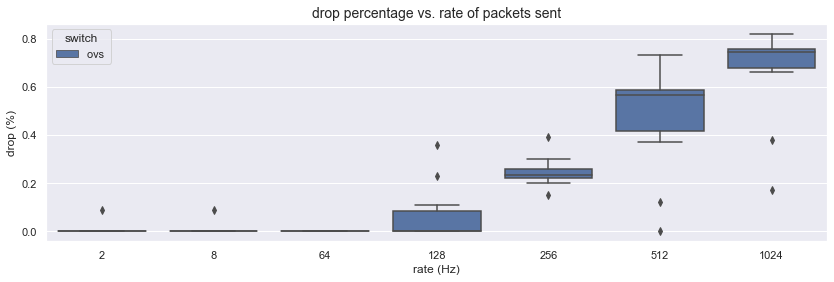

In [40]:
# box plot of drop percentagess
avg_send_time = sns.boxplot(
    data=df, 
    y='drop (%)',
    x="rate (Hz)",
    hue='switch'
).set_title('drop percentage vs. rate of packets sent', fontsize=14)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


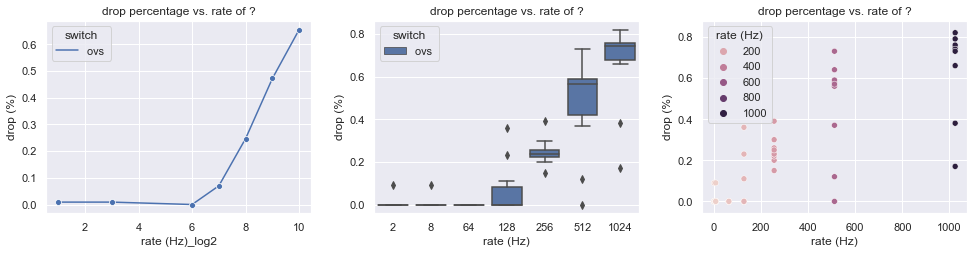

In [41]:
# different wants to plot this 

fig, ax = plt.subplots(1,3, figsize=(14,4))
messages_sec = sns.lineplot(
    data=avg_df, 
    y='drop (%)',
    x="rate (Hz)_log2",
    hue='switch',
    marker='o', 
    ax=ax[0],
    ci=None).set_title('drop percentage vs. rate of ?')

avg_send_time = sns.boxplot(
    data=df, 
    y='drop (%)',
    x="rate (Hz)",
    hue='switch',
#     marker='o',
    ax=ax[1]).set_title('drop percentage vs. rate of ?')

avg_send_time = sns.scatterplot(
    data=df, 
    y='drop (%)',
    x="rate (Hz)",
    hue='rate (Hz)',
#     marker='o',
    ax=ax[2]).set_title('drop percentage vs. rate of ?')

fig.tight_layout(pad=2.0)
fig.show()